<img width="50" src="https://carbonplan-assets.s3.amazonaws.com/monogram/dark-small.png" style="margin-left:0px;margin-top:20px"/>

# FIA Biomass Results

_by Jeremy Freeman (CarbonPlan), October 25, 2020_

This notebook extracts and summarizes results from fitting biomass growth
curves. See the notebook `biomass_modeling` for how the model is fit. This
notebook assumes the model has been run and results have been saved using the
script `biomass.py`.


In [1]:
import pickle
import numpy as np
import pandas as pd
from carbonplan_forest_risks import setup, plot, load

In [2]:
setup.plotting(remote=True)

First we load our model results. This assumes the model has been run and results
have been saved using the script `biomass.py`.


In [4]:
pf = pd.read_parquet(
    "~/forest-risks/data/biomass.parquet"
)

Filter out bad values


In [5]:
badinds = np.isnan(pf["historical"])
for key in pf.columns:
    if key not in ["lat", "lon", "type_code", "r2"]:
        badinds = badinds | np.isnan(pf[key])
pf = pf[~badinds]

We can plot the results from the model, evaluting on the same climate as used
for fitting


In [10]:
plot.carto(
    lat=pf["lat"],
    lon=pf["lon"],
    color=pf["historical"],
    cmap="yellowgreen",
    clim=(0, 250),
    size=1
)

alt.LayerChart(...)

We can also use other columns to look at future scenarios. For example, here's
the difference in biomass from 2020 to 2100.


In [20]:
plot.carto(
    lat=pf["lat"],
    lon=pf["lon"],
    color=pf["ACCESS-ESM1-5_ssp245_2095"] - pf["ACCESS-ESM1-5_ssp245_2025"],
    cmap="yellowgreen",
    clim=(0, 100),
)

alt.LayerChart(...)

Make a time series of spatially averaged projections


In [32]:
years = np.arange(2015, 2105, 10)
y1 = [pf["CanESM5-CanOE_ssp245_" + str(year)].mean() for year in years]
y2 = [pf["CanESM5-CanOE_ssp370_" + str(year)].mean() for year in years]
y3 = [pf["CanESM5-CanOE_ssp585_" + str(year)].mean() for year in years]
opts = {"color": "rgb(75,128,97)", "ylabel": "biomass", "xlabel": "year"}
(
    plot.line(x=years, y=y1, opacity=0.5, ylim=[100, 175], **opts)
    + plot.line(x=years, y=y2, opacity=0.75, **opts)
    + plot.line(x=years, y=y3, opacity=1, **opts)
)

alt.LayerChart(...)

In [48]:
from showit import image

In [49]:
import xarray as xr

In [53]:
ds = xr.open_zarr('~/forest-risks/data/biomass.zarr')

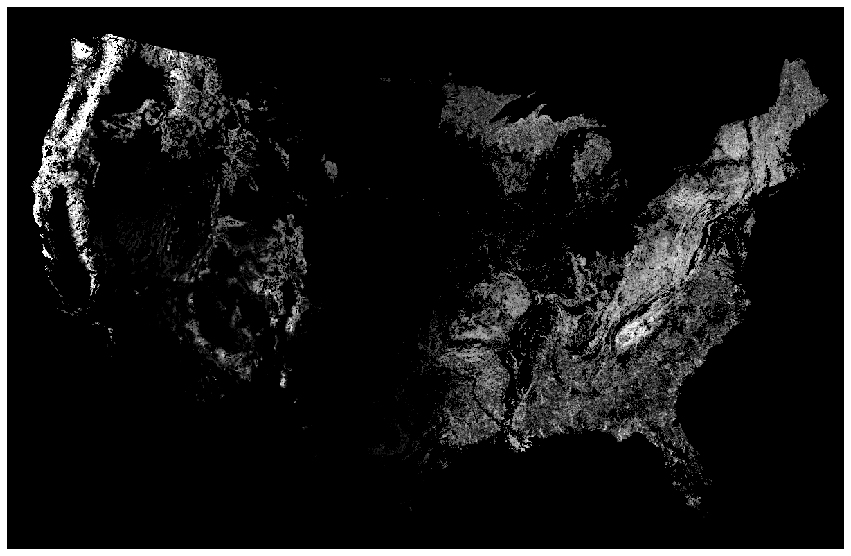

In [67]:
image(ds['ssp245'][0], clim=[0, 200], size=15)